In [104]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from pprint import pp

In [105]:
df = pd.read_csv("data/imputation/state_sector_data.csv")

In [114]:
X = df[["state", "sector", "state_sector_salary", "ds_state_sector_salary"]]
X.rename(columns={"ds_state_sector_salary":"salary"}, inplace=True)
y = X.loc[~X["salary"].isna(), "salary"]
X = X.loc[~X["salary"].isna(), ["state", "sector", "state_sector_salary"]]

encoder = OneHotEncoder(sparse_output=False)
X= encoder.fit_transform(X.iloc[:,:2])
X

/tmp/ipykernel_2410631/3276373975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.rename(columns={"ds_state_sector_salary":"salary"}, inplace=True)


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [115]:
rf = RandomForestRegressor(oob_score=mean_squared_error)

# Define the grid of hyperparameters to search over
param_grid = {
    
    "n_estimators": range(1,500,1),  # Number of trees
    # "max_depth": [None, 10, 20],  # Maximum depth of the trees
    # "min_samples_split": [2, 4, 8],  # Minimum samples required to split a node
    # "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
    # "max_features": [None,
    #     "sqrt",
    #     "log2",
    # ],  # Number of features to consider at each split
}
# Set up the grid search with 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    rf, param_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)
# Fit the grid search on the data

grid_search.fit(X, y)

# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Calculate the best score
best_score = -grid_search.best_score_  # Convert back from negative MSE
print("Best mean squared error:", best_score)

Fitting 5 folds for each of 499 candidates, totalling 2495 fits


/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/red/anaconda3/envs/cda_project/lib/pyt

Best hyperparameters: {'n_estimators': 24}
Best mean squared error: 438946976.8649783


In [116]:
X.state_sector_salary.hist()

AttributeError: 'numpy.ndarray' object has no attribute 'state_sector_salary'

In [ ]:
sorted(X.state.unique())

['Alabama',
 'Alaska',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin']

<Axes: >

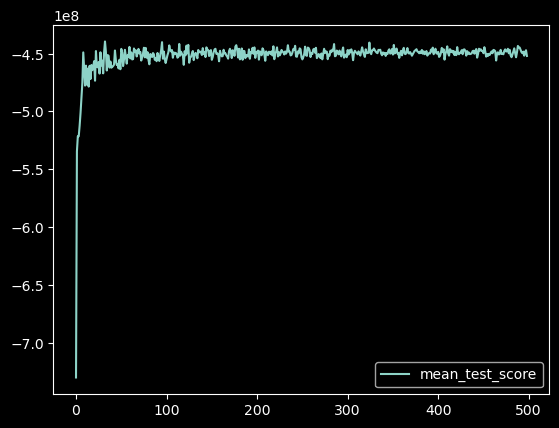

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results[["mean_test_score"]].plot()


In [ ]:
# Define the grid of hyperparameters to search over
param_grid = {
    "n_estimators": [33],  # Number of trees
    "max_depth": list(range(1,40,1)),  # Maximum depth of the trees
    # "min_samples_split": [2, 4, 8],  # Minimum samples required to split a node
    # "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
    # "max_features": [None,
    #     "sqrt",
    #     "log2",
    # ],  # Number of features to consider at each split
}
grid_search = GridSearchCV(
    rf, param_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)
# Set up the grid search with 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    rf, param_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)
# Fit the grid search on the data

grid_search.fit(X, y)

# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Calculate the best score
best_score = -grid_search.best_score_  # Convert back from negative MSE
print("Best mean squared error:", best_score)
results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 39 candidates, totalling 195 fits
Best hyperparameters: {'max_depth': 39, 'n_estimators': 33}
Best mean squared error: 450076085.5024873


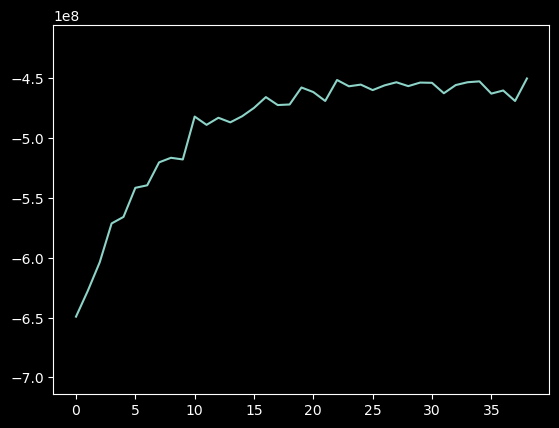

In [ ]:
results.mean_test_score.plot()

plt.ylim((results.mean_test_score.min()*1.1, results.mean_test_score.max()*.9))
plt.vlines(
    x=25,
    ymin=-10,
    ymax=0,
)
plt.show()

In [ ]:
# Define the grid of hyperparameters to search over
param_grid = {
    "n_estimators": list(range(25, 40)),  # Number of trees
    "max_depth": list(range(17, 27, 1)),  # Maximum depth of the trees
    "min_samples_split": list(
        range(23, 28, 1)
    ),  # Minimum samples required to split a node
    "min_samples_leaf": list(range(1, 4)),  # Minimum samples required at a leaf node
    "max_features": [8, 9, 10]
    # ],  # Number of features to consider at each split
}
grid_search = GridSearchCV(
    rf, param_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)
# Set up the grid search with 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    rf, param_grid, cv=kf, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1
)
# Fit the grid search on the data

grid_search.fit(X, y)

# Get the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_rf = grid_search.best_estimator_

# Calculate the best score
best_score = -grid_search.best_score_  # Convert back from negative MSE
print("Best mean squared error:", best_score)
results = pd.DataFrame(grid_search.cv_results_)

Fitting 5 folds for each of 6750 candidates, totalling 33750 fits


/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/red/anaconda3/envs/cda_project/lib/python3.12/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/red/anaconda3/envs/cda_project/lib/pyt

Best hyperparameters: {'max_depth': 26, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 27, 'n_estimators': 32}
Best mean squared error: 444626888.66133153


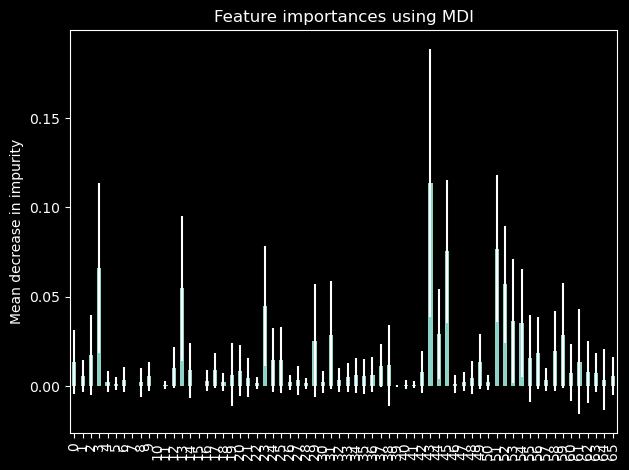

In [ ]:
import time

import numpy as np

start_time = time.time()
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

forest_importances = pd.Series(importances)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
[i for i in dir(best_rf) if "feature" in i]
best_rf._check_feature_names

<bound method BaseEstimator._check_feature_names of RandomForestRegressor(max_depth=26, max_features=10, min_samples_split=27,
                      n_estimators=32,
                      oob_score=<function mean_squared_error at 0x7f000da8f100>)>